In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from itertools import chain
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
channels_states_months = pd.read_excel('sales outline.xlsx', sheet_name='Channels', index_col=0, nrows=26,
                                       usecols=['Channel start month', 'Delhi & Haryana', 'Rajasthan', 'UP & Uttarakhand', 'Punjab',
                                                'MP & Chattisgarh', 'Gujarat', 'Maharashtra', 'Andhra Pradesh & Telengana', 'Karnataka',
                                                'Tamil Nadu', 'Kerala', 'West Bengal', 'Orissa', 'Bihar & Jharkand',
                                                'Rest of India'],
                                       engine='openpyxl')

In [3]:
oem_states_months = channels_states_months[~channels_states_months.index.str.startswith('Salesforce')]
oem_states_months.index.name='OEM'

In [4]:
oem_states_months

,Delhi & Haryana,Rajasthan,UP & Uttarakhand,Punjab,MP & Chattisgarh,Gujarat,Maharashtra,Andhra Pradesh & Telengana,Karnataka,Tamil Nadu,Kerala,West Bengal,Orissa,Bihar & Jharkand,Rest of India
OEM,,,,,,,,,,,,,,,
JCB,1,1,4,10,10,10,4,4,1,7,7,15,15,15,15
Caterpillar,7,7,10,10,10,10,10,10,7,10,10,18,18,18,18
Case,10,10,10,14,14,14,10,10,10,10,10,18,18,18,18
Tata Hitachi,4,4,7,13,13,13,7,7,4,10,10,18,18,18,18
Bull,15,15,18,18,18,18,18,18,15,18,18,21,21,21,21
Escorts,7,7,10,10,10,10,10,10,7,10,10,18,18,18,18
Mahindra,15,15,18,18,18,18,18,18,15,18,18,21,21,21,21
ACE,10,10,10,14,14,14,10,10,10,10,10,18,18,18,18
Hyundai,4,4,7,13,13,13,7,7,4,10,10,18,18,18,18


In [5]:
salesforce_states_months = channels_states_months[channels_states_months.index.str.startswith('Salesforce')]
salesforce_states_months.index.name='Strength'

In [6]:
salesforce_states_months

,Delhi & Haryana,Rajasthan,UP & Uttarakhand,Punjab,MP & Chattisgarh,Gujarat,Maharashtra,Andhra Pradesh & Telengana,Karnataka,Tamil Nadu,Kerala,West Bengal,Orissa,Bihar & Jharkand,Rest of India
Strength,,,,,,,,,,,,,,,
Salesforce 1/4,1,1,3,4,4,2,4,5,5,5,6,6,6,6,7
Salesforce 1/2,1,3,5,6,6,4,6,7,7,7,8,8,8,8,9
Salesforce 3/4,1,4,6,7,7,5,7,8,8,8,9,9,9,9,10
Salesforce full,1,5,7,8,8,6,8,9,9,9,10,10,10,10,11


In [7]:
bank_states_mkt_share = pd.read_excel('sales outline.xlsx', sheet_name='FIs', index_col=0, nrows=14, engine='openpyxl')
bank_states_mkt_share.index.name='FI'
bank_states_mkt_share = bank_states_mkt_share / 100

In [8]:
bank_states_mkt_share

,Delhi & Haryana,Rajasthan,UP & Uttarakhand,Punjab,MP & Chattisgarh,Gujarat,Maharashtra,Andhra Pradesh & Telengana,Karnataka,Tamil Nadu,Kerala,West Bengal,Orissa,Bihar & Jharkand,Rest of India
FI,,,,,,,,,,,,,,,
Federal,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
AU,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
HDFC,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
Yes,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
IndusInd,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
Axis,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
ICICI,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
BOB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SBI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
bank_states_months = pd.read_excel('sales outline.xlsx', sheet_name='FIs', index_col=0, skiprows=17, engine='openpyxl')
bank_states_months.index.name='FI'

In [10]:
bank_states_months

,Delhi & Haryana,Rajasthan,UP & Uttarakhand,Punjab,MP & Chattisgarh,Gujarat,Maharashtra,Andhra Pradesh & Telengana,Karnataka,Tamil Nadu,Kerala,West Bengal,Orissa,Bihar & Jharkand,Rest of India
FI,,,,,,,,,,,,,,,
Federal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AU,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
HDFC,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Yes,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
IndusInd,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Axis,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ICICI,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
BOB,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
SBI,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [11]:
oem_prod_prices = pd.read_excel('sales outline.xlsx', sheet_name='Prices', index_col=0, engine='openpyxl')
oem_prod_prices.index.name = 'OEM'
for col in oem_prod_prices:
    oem_prod_prices[col] = oem_prod_prices[col].str.slice(1).str.replace(',', '').astype(float)

In [12]:
oem_prod_prices

,Back hoe,Excavator,Crane,Compactor,Wheel loader,Specialised
OEM,,,,,,
JCB,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Caterpillar,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Case,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Tata Hitachi,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Bull,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Escorts,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Mahindra,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
ACE,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0
Hyundai,3000000.0,5000000.0,1500000.0,3000000.0,3000000.0,3000000.0


In [13]:
oem_prod_state_vol = pd.read_excel('sales outline.xlsx', sheet_name='Volumes', index_col=0, engine='openpyxl')
oem_prod_state_vol.index.name = 'OEM'

In [14]:
oem_prod_state_vol

,Product,Delhi & Haryana,Rajasthan,UP & Uttarakhand,Punjab,MP & Chattisgarh,Gujarat,Maharashtra,Andhra Pradesh & Telengana,Karnataka,Tamil Nadu,Kerala,West Bengal,Orissa,Bihar & Jharkand,Rest of India
OEM,,,,,,,,,,,,,,,,
JCB,Back hoe,168,252,336,168,168,252,504,336,252,252,168,84,168,84,168
JCB,Excavator,21,32,42,21,21,32,63,42,32,32,21,11,21,11,21
JCB,Crane,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JCB,Compactor,6,9,12,6,6,9,17,12,9,9,6,3,6,3,6
JCB,Wheel loader,13,19,25,13,13,19,38,25,19,19,13,7,13,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Used,Back hoe,10,15,20,10,10,15,30,20,15,15,10,5,10,5,10
Used,Excavator,8,12,15,8,8,12,23,15,12,12,8,4,8,4,8
Used,Crane,3,4,5,3,3,4,8,5,4,4,3,2,3,2,3


## timeseries

In [15]:
def month_state_pivot(df, state, total_months=36):
    state_df = pd.get_dummies(df[state]).T
    state_df.index.name = 'Month'
    state_df = state_df.replace(0, np.nan)
    state_df = state_df.reindex(list(range(1, total_months+1)), method='ffill')
    for col in state_df.columns:
        col_first_valid = state_df[[col]].first_valid_index()
        state_df.loc[state_df.index > col_first_valid, col] = 1
        state_df[col] = state_df[col].fillna(0)
        state_df[col] = state_df[col].astype(int)
        state_df[col] = state_df[col].cumsum()
    state_df['State'] = state
    #cols = state_df.columns.to_list()
    #state_df = state_df[cols[-1:] + cols[:-1]]
    state_df = state_df.set_index('State', append=True)
    return state_df

def state_wise_pivot_to_timeseries(df):
    def yield_state_wise_start_months(df):
        for state in df.columns:
            yield month_state_pivot(df, state)

    df = pd.concat(yield_state_wise_start_months(df))
    return df

In [16]:
# validate basic pivot function
#month_state_pivot(oem_states_months, 'UP & Uttarakhand')

In [17]:
oem_states = state_wise_pivot_to_timeseries(oem_states_months)
staff_states = state_wise_pivot_to_timeseries(salesforce_states_months)
fi_states = state_wise_pivot_to_timeseries(bank_states_months)

In [18]:
oems = oem_states.columns
prods = oem_prod_prices.columns
for col in oems:
    for prod in prods[1:]:
        oem_states[f'{col}.{prod}'] = oem_states[col]
    oem_states = oem_states.rename(columns={col: f'{col}.{prods[0]}'})

oem_states = oem_states[[f'{oem}.{prod}' for oem in oems for prod in prods]]

In [19]:
timeline_df = staff_states.join(oem_states).join(fi_states)

In [20]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_df.head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland
Month,State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Delhi & Haryana,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Delhi & Haryana,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
fi_mkt_share = bank_states_mkt_share.T
fi_mkt_share.index.name = 'State'

In [22]:
timeline_df = timeline_df.join(fi_mkt_share, rsuffix=' mkt_share')

In [23]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_df.head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share
Month,State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Delhi & Haryana,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,0.0,0.15,0.05,0.25,0.1,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.0
2,Delhi & Haryana,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,0.0,0.15,0.05,0.25,0.1,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.0


In [24]:
oem_volumes = oem_prod_state_vol.reset_index()
oem_volumes = oem_volumes.set_index(oem_volumes.OEM + '.' + oem_volumes.Product)
oem_volumes = oem_volumes.drop(columns=['OEM', 'Product'])
oem_volumes = oem_volumes.T
oem_volumes.index.name = 'State'

In [25]:
timeline_df = timeline_df.join(oem_volumes, rsuffix=' vol')

In [26]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_df.head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [27]:
oem_prices = oem_prod_prices.unstack().reset_index()
oem_prices.columns = ['Product', 'OEM', 'Price']
oem_prices['idx'] = oem_prices.OEM + '.' + oem_prices.Product + ' Price'
oem_prices = oem_prices.drop(columns =['Product', 'OEM'])
oem_prices = oem_prices.set_index('idx').T.reset_index(drop=True)
oem_prices = oem_prices.reindex(staff_states.index.get_level_values(0).unique(), method='pad')

In [28]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(oem_prices.head(2))

idx,JCB.Back hoe Price,Caterpillar.Back hoe Price,Case.Back hoe Price,Tata Hitachi.Back hoe Price,Bull.Back hoe Price,Escorts.Back hoe Price,Mahindra.Back hoe Price,ACE.Back hoe Price,Hyundai.Back hoe Price,Sany.Back hoe Price,Kobelco.Back hoe Price,Komatsu.Back hoe Price,XCMG.Back hoe Price,Volvo.Back hoe Price,Liugong.Back hoe Price,SDLG.Back hoe Price,CNH.Back hoe Price,Doosan.Back hoe Price,Dynapac.Back hoe Price,HAMM.Back hoe Price,L&T.Back hoe Price,Others.Back hoe Price,Used.Back hoe Price,JCB.Excavator Price,Caterpillar.Excavator Price,Case.Excavator Price,Tata Hitachi.Excavator Price,Bull.Excavator Price,Escorts.Excavator Price,Mahindra.Excavator Price,ACE.Excavator Price,Hyundai.Excavator Price,Sany.Excavator Price,Kobelco.Excavator Price,Komatsu.Excavator Price,XCMG.Excavator Price,Volvo.Excavator Price,Liugong.Excavator Price,SDLG.Excavator Price,CNH.Excavator Price,Doosan.Excavator Price,Dynapac.Excavator Price,HAMM.Excavator Price,L&T.Excavator Price,Others.Excavator Price,Used.Excavator Price,JCB.Crane Price,Caterpillar.Crane Price,Case.Crane Price,Tata Hitachi.Crane Price,Bull.Crane Price,Escorts.Crane Price,Mahindra.Crane Price,ACE.Crane Price,Hyundai.Crane Price,Sany.Crane Price,Kobelco.Crane Price,Komatsu.Crane Price,XCMG.Crane Price,Volvo.Crane Price,Liugong.Crane Price,SDLG.Crane Price,CNH.Crane Price,Doosan.Crane Price,Dynapac.Crane Price,HAMM.Crane Price,L&T.Crane Price,Others.Crane Price,Used.Crane Price,JCB.Compactor Price,Caterpillar.Compactor Price,Case.Compactor Price,Tata Hitachi.Compactor Price,Bull.Compactor Price,Escorts.Compactor Price,Mahindra.Compactor Price,ACE.Compactor Price,Hyundai.Compactor Price,Sany.Compactor Price,Kobelco.Compactor Price,Komatsu.Compactor Price,XCMG.Compactor Price,Volvo.Compactor Price,Liugong.Compactor Price,SDLG.Compactor Price,CNH.Compactor Price,Doosan.Compactor Price,Dynapac.Compactor Price,HAMM.Compactor Price,L&T.Compactor Price,Others.Compactor Price,Used.Compactor Price,JCB.Wheel loader Price,Caterpillar.Wheel loader Price,Case.Wheel loader Price,Tata Hitachi.Wheel loader Price,Bull.Wheel loader Price,Escorts.Wheel loader Price,Mahindra.Wheel loader Price,ACE.Wheel loader Price,Hyundai.Wheel loader Price,Sany.Wheel loader Price,Kobelco.Wheel loader Price,Komatsu.Wheel loader Price,XCMG.Wheel loader Price,Volvo.Wheel loader Price,Liugong.Wheel loader Price,SDLG.Wheel loader Price,CNH.Wheel loader Price,Doosan.Wheel loader Price,Dynapac.Wheel loader Price,HAMM.Wheel loader Price,L&T.Wheel loader Price,Others.Wheel loader Price,Used.Wheel loader Price,JCB.Specialised Price,Caterpillar.Specialised Price,Case.Specialised Price,Tata Hitachi.Specialised Price,Bull.Specialised Price,Escorts.Specialised Price,Mahindra.Specialised Price,ACE.Specialised Price,Hyundai.Specialised Price,Sany.Specialised Price,Kobelco.Specialised Price,Komatsu.Specialised Price,XCMG.Specialised Price,Volvo.Specialised Price,Liugong.Specialised Price,SDLG.Specialised Price,CNH.Specialised Price,Doosan.Specialised Price,Dynapac.Specialised Price,HAMM.Specialised Price,L&T.Specialised Price,Others.Specialised Price,Used.Specialised Price
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,NaN,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,NaN,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,NaN,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,30

In [29]:
timeline_df = timeline_df.join(oem_prices)

In [30]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_df.head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

## Projection

```For month of Aug
Seasonlality factor Q1=1.1, Q2=1.1, Q3=0.8, Q4=1

For Delhi & Haryana, For JCB, For Federal:

Delhi CE financing volume -> (100% LTV, 0.3% commission)

number_of_months_in_partnership_with_Federal_in_Delhi

Federal_Delhi_market_share -> (25%, 50%, 75% as months in partnership increase)

number_of_months_in_partnership_with_JCB_in_Delhi

JCB_Delhi_Sales -> (10%, 20%, 30%, 40%, 50%, 60% as months in partnership increase)

number_of_months_since_salesforce_at_quarter_strength -> (treat >0 as first quartile sales captured)

number_of_months_since_salesforce_at_half_strength -> (treat >0 as second quartile sales captured)

number_of_months_since_salesforce_at_three_quarters_strength -> (treat >0 as third quartile sales captured)

number_of_months_since_salesforce_at_full_strength -> (treat >0 as final quartile sales captured)

Application volume -> (25% chunks of sales volume captures for each quarter of salesforce strength)

matched volume min(application volume, Federal Delhi volume)

remaining volume of bank

disbursed volume
```

In [61]:
timeline_sales = timeline_df.copy()

In [62]:
new_LTV = 0.8
new_commission = 0.003
oem_cols = [oem for oem in oem_states.columns if f'{oem} vol' in timeline_sales.columns]

In [63]:
timeline_sales['new fin vol'] = pd.concat([timeline_sales[f'{oem} vol'] * oem_prices[f'{oem} Price']
                                           for oem in oem_cols], axis=1).sum(axis=1) * new_LTV
timeline_sales['used fin vol'] = timeline_sales['new fin vol'] * 0.05

fi_partnership_duration_factor = defaultdict(lambda x: 0.75)
for k,v in {0: 0, 1: 0.25, 2: 0.5, 3: 0.75}.items():
    fi_partnership_duration_factor[k] = v

for fi in fi_mkt_share.columns:
    timeline_sales[f'{fi} cap'] = timeline_sales[f'{fi} mkt_share'] * timeline_sales['new fin vol'] \
        * timeline_sales.apply(lambda r: r[fi], axis=1)

In [64]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_sales.query('State=="Delhi & Haryana"').head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [65]:
start_date = pd.to_datetime('2022-07-01')

In [66]:
month_series = timeline_sales.reset_index().apply(
    lambda x: start_date + pd.DateOffset(months = x.Month - 1), axis=1)
timeline_sales = timeline_sales.reset_index(level=0, drop=True).reset_index()
timeline_sales['Month'] = month_series
timeline_sales = timeline_sales.set_index(['Month', 'State'])
timeline_sales['Quarter'] = timeline_sales.index.get_level_values(level='Month').quarter

In [67]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_sales.query('State=="Delhi & Haryana"').head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [68]:
seasonality_fator = {1: 1.1, 2: 1.1, 3: 0.8, 4: 1}

for oem in oem_cols:
    timeline_sales[f'{oem} vol'] = \
        timeline_sales[f'{oem} vol'] * timeline_sales.apply(lambda row: seasonality_fator[row.Quarter], axis=1)
    timeline_sales[f'{oem} vol'] = timeline_sales[f'{oem} vol']

In [69]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_sales.query('State=="Delhi & Haryana"').head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [70]:
def const_factory(val):
    return lambda: val

oem_partnership_factor = defaultdict(const_factory(0.6))
for k,v in {0: 0, 1: 0.1, 2: 0.2, 3: 0.3}.items():
    oem_partnership_factor[k] = v

for oem in oem_cols:
    timeline_sales[f'{oem} vol'] = \
        timeline_sales[f'{oem} vol'] * timeline_sales.apply(lambda row: oem_partnership_factor[row[oem]], axis=1)
    timeline_sales[f'{oem} vol'] = np.ceil(timeline_sales[f'{oem} vol'])

timeline_sales['available new sales'] = pd.concat([timeline_sales[f'{oem} vol'] * timeline_sales[f'{oem} Price'] 
                                                for oem in oem_cols], axis=1).sum(axis=1) * new_LTV

In [71]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_sales.query('State=="Delhi & Haryana"').head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [72]:
timeline_sales['acquired new sales'] = \
    np.where(timeline_sales['Salesforce 1/4'] > 0, 0.25 * timeline_sales['available new sales'], 0) + \
    np.where(timeline_sales['Salesforce 1/2'] > 0, 0.25 * timeline_sales['available new sales'], 0) + \
    np.where(timeline_sales['Salesforce 3/4'] > 0, 0.25 * timeline_sales['available new sales'], 0) + \
    np.where(timeline_sales['Salesforce full'] > 0, 0.25 * timeline_sales['available new sales'], 0)

for idx, fi in enumerate(fi_mkt_share.columns):
    supply_col = f'fi oflow {idx}' if idx > 0 else 'acquired new sales'
    timeline_sales[f'{fi} match sales'] = timeline_sales[[supply_col, f'{fi} cap']].min(axis=1)
    overflow_col = f'fi oflow {idx+1}'
    timeline_sales[overflow_col] = np.maximum(timeline_sales[supply_col] - timeline_sales[f'{fi} match sales'], 0)

timeline_sales['match new sales'] = timeline_sales[[f'{fi} match sales' for fi in fi_mkt_share.columns]].sum(axis=1)
timeline_sales['unmatch new sales'] = timeline_sales['acquired new sales'] - timeline_sales['match new sales']
timeline_sales['revenue new'] = timeline_sales['match new sales'] * new_commission

In [73]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_sales.query('State=="Delhi & Haryana"').head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [93]:
oem = 'JCB.Back hoe'
pd.concat([(timeline_sales[supply_col] / timeline_sales[f'{oem} Price']).round(), timeline_sales[f'{oem} vol']], axis=1).min(axis=1)

Month       State          
2022-07-01  Delhi & Haryana     14.0
2022-08-01  Delhi & Haryana     27.0
2022-09-01  Delhi & Haryana     41.0
2022-10-01  Delhi & Haryana    101.0
2022-11-01  Delhi & Haryana    101.0
                               ...  
2025-02-01  Rest of India      111.0
2025-03-01  Rest of India      111.0
2025-04-01  Rest of India      111.0
2025-05-01  Rest of India      111.0
2025-06-01  Rest of India      111.0
Length: 540, dtype: float64

In [96]:
for idx, oem in enumerate(oem_cols):
    supply_col = f'oem oflow {idx}' if idx > 0 else 'match new sales'
    timeline_sales[f'{oem} match vol'] = pd.concat(
        [(timeline_sales[supply_col] / timeline_sales[f'{oem} Price']).round(),
         timeline_sales[f'{oem} vol']], axis=1
    ).min(axis=1)
    timeline_sales[f'{oem} match sales'] = timeline_sales[f'{oem} match vol'] * timeline_sales[f'{oem} Price']
    overflow_col = f'oem oflow {idx+1}'
    timeline_sales[overflow_col] = np.maximum(timeline_sales[supply_col] - timeline_sales[f'{oem} match sales'], 0)

timeline_sales['match new vol'] = timeline_sales[[f'{oem} match vol' for oem in oem_cols]].sum(axis=1)

In [98]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(timeline_sales.query('State=="Delhi & Haryana"').head(2))

,,Salesforce 1/4,Salesforce 1/2,Salesforce 3/4,Salesforce full,JCB.Back hoe,JCB.Excavator,JCB.Crane,JCB.Compactor,JCB.Wheel loader,JCB.Specialised,Caterpillar.Back hoe,Caterpillar.Excavator,Caterpillar.Crane,Caterpillar.Compactor,Caterpillar.Wheel loader,Caterpillar.Specialised,Case.Back hoe,Case.Excavator,Case.Crane,Case.Compactor,Case.Wheel loader,Case.Specialised,Tata Hitachi.Back hoe,Tata Hitachi.Excavator,Tata Hitachi.Crane,Tata Hitachi.Compactor,Tata Hitachi.Wheel loader,Tata Hitachi.Specialised,Bull.Back hoe,Bull.Excavator,Bull.Crane,Bull.Compactor,Bull.Wheel loader,Bull.Specialised,Escorts.Back hoe,Escorts.Excavator,Escorts.Crane,Escorts.Compactor,Escorts.Wheel loader,Escorts.Specialised,Mahindra.Back hoe,Mahindra.Excavator,Mahindra.Crane,Mahindra.Compactor,Mahindra.Wheel loader,Mahindra.Specialised,ACE.Back hoe,ACE.Excavator,ACE.Crane,ACE.Compactor,ACE.Wheel loader,ACE.Specialised,Hyundai.Back hoe,Hyundai.Excavator,Hyundai.Crane,Hyundai.Compactor,Hyundai.Wheel loader,Hyundai.Specialised,Sany.Back hoe,Sany.Excavator,Sany.Crane,Sany.Compactor,Sany.Wheel loader,Sany.Specialised,Kobelco.Back hoe,Kobelco.Excavator,Kobelco.Crane,Kobelco.Compactor,Kobelco.Wheel loader,Kobelco.Specialised,Komatsu.Back hoe,Komatsu.Excavator,Komatsu.Crane,Komatsu.Compactor,Komatsu.Wheel loader,Komatsu.Specialised,XCMG.Back hoe,XCMG.Excavator,XCMG.Crane,XCMG.Compactor,XCMG.Wheel loader,XCMG.Specialised,Volvo.Back hoe,Volvo.Excavator,Volvo.Crane,Volvo.Compactor,Volvo.Wheel loader,Volvo.Specialised,Liugong.Back hoe,Liugong.Excavator,Liugong.Crane,Liugong.Compactor,Liugong.Wheel loader,Liugong.Specialised,SDLG.Back hoe,SDLG.Excavator,SDLG.Crane,SDLG.Compactor,SDLG.Wheel loader,SDLG.Specialised,CNH.Back hoe,CNH.Excavator,CNH.Crane,CNH.Compactor,CNH.Wheel loader,CNH.Specialised,Doosan.Back hoe,Doosan.Excavator,Doosan.Crane,Doosan.Compactor,Doosan.Wheel loader,Doosan.Specialised,Dynapac.Back hoe,Dynapac.Excavator,Dynapac.Crane,Dynapac.Compactor,Dynapac.Wheel loader,Dynapac.Specialised,HAMM.Back hoe,HAMM.Excavator,HAMM.Crane,HAMM.Compactor,HAMM.Wheel loader,HAMM.Specialised,L&T.Back hoe,L&T.Excavator,L&T.Crane,L&T.Compactor,L&T.Wheel loader,L&T.Specialised,Others.Back hoe,Others.Excavator,Others.Crane,Others.Compactor,Others.Wheel loader,Others.Specialised,Federal,AU,HDFC,Yes,IndusInd,Axis,ICICI,BOB,SBI,PNB,HDB FS,Cholamandalam,Sundaram,Hinduja Leyland,Federal mkt_share,AU mkt_share,HDFC mkt_share,Yes mkt_share,IndusInd mkt_share,Axis mkt_share,ICICI mkt_share,BOB mkt_share,SBI mkt_share,PNB mkt_share,HDB FS mkt_share,Cholamandalam mkt_share,Sundaram mkt_share,Hinduja Leyland mkt_share,JCB.Back hoe vol,JCB.Excavator vol,JCB.Crane vol,JCB.Compactor vol,JCB.Wheel loader vol,Caterpillar.Back hoe vol,Caterpillar.Excavator vol,Caterpillar.Crane vol,Caterpillar.Compactor vol,Caterpillar.Wheel loader vol,Case.Back hoe vol,Case.Excavator vol,Case.Crane vol,Case.Compactor vol,Case.Wheel loader vol,Tata Hitachi.Back hoe vol,Tata Hitachi.Excavator vol,Tata Hitachi.Crane vol,Tata Hitachi.Compactor vol,Tata Hitachi.Wheel loader vol,Bull.Back hoe vol,Bull.Excavator vol,Bull.Crane vol,Bull.Compactor vol,Bull.Wheel loader vol,Escorts.Back hoe vol,Escorts.Excavator vol,Escorts.Crane vol,Escorts.Compactor vol,Escorts.Wheel loader vol,Mahindra.Back hoe vol,Mahindra.Excavator vol,Mahindra.Crane vol,Mahindra.Compactor vol,Mahindra.Wheel loader vol,ACE.Back hoe vol,ACE.Excavator vol,ACE.Crane vol,ACE.Compactor vol,ACE.Wheel loader vol,Hyundai.Back hoe vol,Hyundai.Excavator vol,Hyundai.Crane vol,Hyundai.Compactor vol,Hyundai.Wheel loader vol,Sany.Back hoe vol,Sany.Excavator vol,Sany.Crane vol,Sany.Compactor vol,Sany.Wheel loader vol,Kobelco.Back hoe vol,Kobelco.Excavator vol,Kobelco.Crane vol,Kobelco.Compactor vol,Kobelco.Wheel loader vol,Komatsu.Back hoe vol,Komatsu.Excavator vol,Komatsu.Crane vol,Komatsu.Compactor vol,Komatsu.Wheel loader vol,XCMG.Back hoe vol,XCMG.Excavator vol,XCMG.Crane vol,XCMG.Compactor vol,XCMG.Wheel loader vol,Volvo.Back hoe vol,Volvo.Excavator vol,

In [100]:
revenues = timeline_sales.groupby('Month')['match new vol', 'match new sales', 'revenue new'].sum()

def prettify_revenues(df, volume_cols=['match new vol'], currency_cols=['match new sales', 'revenue new']):
    def currency_format(x):
        return "₹{:.1f}K".format(x/1000)
    
    pretty = df.copy()
    for col in df.columns.intersection(volume_cols):
        pretty[col] = pretty[col].round(0)
    for col in df.columns.intersection(currency_cols):
        pretty[col] = pretty[col].apply(currency_format)
    return pretty

display(prettify_revenues(revenues))

/Users/kunalc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,match new vol,match new sales,revenue new
Month,,,
2022-07-01,22.0,₹66200.0K,₹198.6K
2022-08-01,40.0,₹124600.0K,₹373.8K
2022-09-01,77.0,₹235600.0K,₹706.8K
2022-10-01,280.0,₹866200.0K,₹2598.6K
2022-11-01,453.0,₹1428600.0K,₹4285.8K
2022-12-01,587.0,₹1864000.0K,₹5592.0K
2023-01-01,1328.0,₹4277400.0K,₹12832.2K
2023-02-01,1694.0,₹5524600.0K,₹16573.8K
2023-03-01,1959.0,₹6569600.0K,₹19708.8K


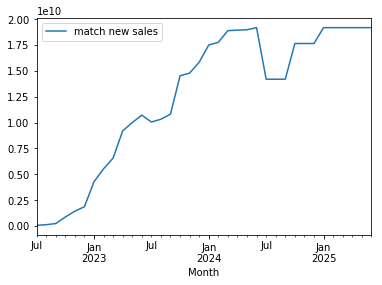

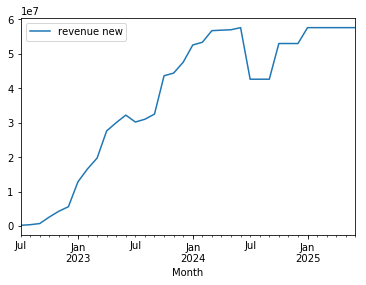

In [107]:
revenues[['match new sales']].plot()
plt.show()
revenues[['revenue new']].plot()
plt.show()

In [102]:
revenues['year'] = divmod(12 * (revenues.index.year - start_date.year).values +
                               (revenues.index.month - start_date.month).values,
                          12)[0] + 1

In [103]:
yearly = revenues.groupby('year').sum()

display(prettify_revenues(yearly))

,match new vol,match new sales,revenue new
year,,,
1,15257.0,₹50872800.0K,₹152618.4K
2,55205.0,₹187624800.0K,₹562874.4K
3,61383.0,₹210632400.0K,₹631897.2K


In [104]:
revenues.to_csv('monthly_revenues.csv')

## Used -> 5% of new, 80% LTV, 1% commission
